# Machine Learning em Python - Parte 1 - Classificação

In [2]:
import sklearn as sl
import warnings
warnings.filterwarnings("ignore")
sl.__version__

'0.20.3'

## Definição do Problema de Negócio

Vamos criar um modelo preditivo que seja capaz de prever se uma pessoa pode ou não desenvolver diabetes. Para isso, usaremos dados históricos de pacientes, disponíveis no dataset abaixo.

Dataset: Pima Indians Diabetes Data Set
http://archive.ics.uci.edu/ml/datasets/diabetes

Este dataset descreve os registros médicos entre pacientes do Pima Inidians e cada registro está marcado se o paciente desenvolveu ou não diabetes. 

### Informações sobre os atributos:

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

## Extraindo e Carregando os Dados

Existem diversas considerações ao se carregar dados para o processo de Machine Learning. Por exemplo: seus dados possuem um header (cabeçalho)? Caso negativo, você vai precisar definir o título para cada coluna. Seus arquivos possuem comentários? Qual o delimitador das colunas? Alguns dados estão entre aspas, simples ou duplas?

In [3]:
# Carregando arquivo csv usando NumPy
import numpy as np
arquivo = 'data/pima-data.csv'
arquivo_data = open(arquivo, 'rb')
dados = np.loadtxt(arquivo_data, delimiter = ",")
print(dados.shape)

(768, 9)


In [4]:
# Carregando arquivo csv usando Pandas
import pandas as pd
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = pd.read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


In [5]:
# Carregando arquivo csv usando Pandas (método que usaremos neste notebook)
from pandas import read_csv
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
print(dados.shape)

(768, 9)


## Análise Exploratória de Dados

### Estatística Descritiva

In [6]:
# Visualizando as primeiras 20 linhas
dados.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Se o número de linhas no seu arquivo for muito grande, o algoritmo pode levar muito tempo para ser treinado. Se o número de registros for muito pequeno, você pode não ter registros suficientes para treinar seu modelo.

Se você tiver muitas colunas em seu arquivo, o algoritmo pode apresentar problemas de performance devido a alta dimensionalidade.

A melhor solução vai depender de cada caso. Mas lembre-se: treine seu modelo em um subset do seu conjunto de dados maior e depois aplique o modelo a novos dados.


In [7]:
# Visualizando as dimensões
dados.shape

(768, 9)

O tipo dos dados é muito importante. Pode ser necessário converter strings, ou colunas com números inteiros podem representar variáveis categóricas ou valores ordinários.

In [8]:
# Tipo de dados de cada atributo
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [9]:
# Sumário estatístico
dados.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Em problemas de classificação pode ser necessário balancear as classes. Classes desbalanceadas (ou seja, volume maior de um dos tipos das classes) são comuns e precisam ser tratadas durante a fase de pré-processamento. Podemos ver abaixo que existe uma clara desproporção entre as classes 0 (não ocorrência de diabetes) e 1 (ocorrência de diabetes).

In [10]:
# Distribuição das classes
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

A correlação é o relacionamento entre 2 variáveis. O método mais comum para calcular correlação é o método de Pearson, que assume uma distribuição normal dos dados. Correlação de -1 mostra uma correlação negativa, enquanto uma correlação de +1 mostra uma correlação positiva. Uma correlação igual a 0 mostra que não há relacionamento entre as variáveis.

Alguns algoritmos como regressão linear e regressão logística podem apresentar problemas de performance se houver atributos altamente correlacionados (colineares).

In [11]:
# Correlação de Pearson
dados.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Skew (ou simetria) se refere a distribuição dos dados que é assumida ser normal ou gaussiana (bell curve). Muitos algoritmos de Machine Learning consideram que os dados possuem uma distribuição normal. Conhecendo a simetria dos dados, permite que você faça uma preparação e entregue o que o algoritmo espera receber, aumentado desta forma a acurácia do modelo preditivo.

In [12]:
# Verificando o skew de cada atributo
dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

### Visualização com Matplotlib

In [13]:
import matplotlib.pyplot as plt
# Por se tratar de um conjunto de gráficos menores, pode ser mais interessante 
# gerar os gráficos em janela separada
# %matplotlib inline

Com o histograma podemos rapidamente avaliar a distribuição de cada atributo. Os histogramas agrupam os dados em bins e fornecem uma contagem do número de observações em cada bin. Com o histograma, você pode rapidamente verificar a simetria dos dados e se eles estão em distribuição normal ou não. Isso também vai ajudar na identificação dos outliers.

Podemos ver que os atributos age, pedi e test possuem uma distribuição exponencial. Podemos ver que as colunas mass e press possuem uma distribuição normal.

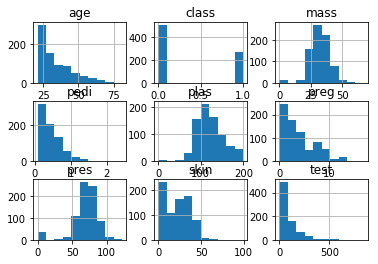

In [14]:
# Histograma Univariado
dados.hist()
plt.show()

Os Density Plots são outra forma de visualizar a distribuição dos dados para cada atributo. O plot é como uma espécie de histograma abstrato com uma curva suave através do topo dos bins de um histograma. Pode ser mais fácil identificar a distribuição dos dados usando um density plot.

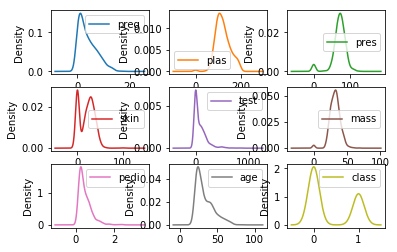

In [15]:
# Density Plot Univariado
dados.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

Com os boxplots também podemos revisar a distribuição dos dados para cada atributo. A linha no centro (vermelho) é o valor da mediana (quartil 50%), a linha abaixo é o quartil 25% e a linha acima o quartil 75%. O boxplot ajuda a ter uma ideia da dispersão dos dados e os possíveis outliers.

Podemos ver que a dispersão dos dados é bem diferente entre os atributos. As colunas age, skin e test possuem uma simetria muito próxima a valores de dados menores.

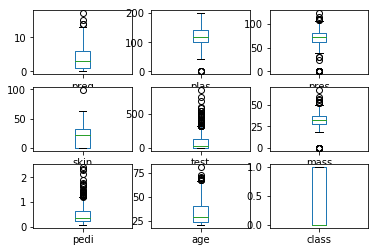

In [16]:
# Box and Whisker Plots, bom para ver outliers
dados.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, 
           sharey = False)
plt.show()

In [ ]:
# Matriz de Correlação com nomes das variáveis
correlations = dados.corr()

# Plot
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

In [ ]:
# Matriz de Correlação genérica
correlations = dados.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin = -1, vmax = 1)
fig.colorbar(cax)
plt.show()

Um scatterplot mostra o relacionamento entre duas variáveis como pontos em duas dimensões, sendo um eixo para cada variável. Podemos criar um scatterplot para cada par de variáveis em nosso dataset. A exemplo da matriz de correlação, o scatterplot matrix é simétrico.

In [ ]:
# Scatter Plot 
from pandas.plotting import scatter_matrix
scatter_matrix(dados)
plt.show()

### Visualização com Seaborn

In [20]:
import seaborn as sns

In [ ]:
# Pairplot
sns.pairplot(dados)

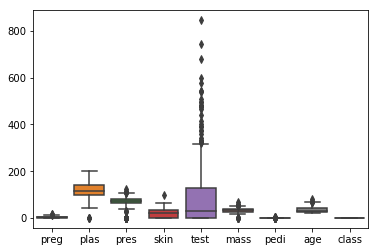

In [22]:
# Boxplot com orientação vertical
sns.boxplot(data = dados, orient = "v")

In [ ]:
# Clustermap
sns.clustermap(dados)

In [ ]:
dados.describe

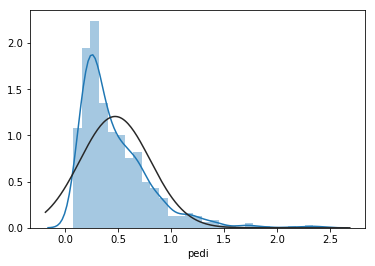

In [25]:
from scipy import stats
sns.distplot(dados.pedi, fit = stats.norm);

## Preparando os Dados para Machine Learning

Muitos algoritmos esperam receber os dados em um formato específico. É seu trabalho preparar os dados em uma estrutura que seja adequada ao algoritmo que você está utilizando.

É muito provável que você tenha que realizar tarefas de pré-processamento nos dados. Esse é um passo necessário dentro do processo. O desafio é o fato que cada algoritmo requer uma estrutura diferente, o que pode requerer transformações diferentes nos dados. Mas é possível em alguns casos, obter bons resultados sem um trabalho de pré-processamento. Mas é uma boa prática criar diferentes visões e transformações dos dados, de modo a poder testar diferentes algoritmos de Machine Learning.

## Normalização - Método 1

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

E uma das primeiras tarefas dentro do pré-processamento, é colocar seus dados na mesma escala. Muitos algoritmos de Machine Learning vão se beneficiar disso e produzir resultados melhores. Esta etapa também é chamada de normalização e significa colocar os dados em uma escala com range entre 0 e 1. Isso é útil para a otimização, sendo usado no core dos algoritmos de Machine Learning, como gradient descent. Isso também é útil para algoritmos como regressão e redes neurais e algoritmos que usam medidas de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada MinMaxScaler().

In [26]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input (X) e output (Y)
X = array[:,0:8]
Y = array[:,8]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


## Normalização - Método 2

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html

No scikit-learn, normalização se refere a ajustar a escala de cada observação (linha) de modo que ela tenha comprimento igual a 1 (chamado vetor de comprimento 1 em álgebra linear). Este método de pré-processamento é útil quando temos datasets esparsos (com muitos zeros) e atributos com escala muito variada. Útil quando usamos algoritmos de redes neurais ou que usam medida de distância, como KNN. O scikit-learn possui uma função para esta etapa, chamada Normalizer().

In [27]:
# Normalizando os dados (comprimento igual a 1)
from pandas import read_csv
from sklearn.preprocessing import Normalizer

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando os dados normalizados
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", normalizedX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.03355237 0.82762513 0.40262844 0.19572216 0.         0.18789327
  0.00350622 0.27960308]
 [0.008424   0.71604034 0.55598426 0.24429612 0.         0.22407851
  0.00295683 0.26114412]
 [0.04039768 0.92409698 0.32318146 0.         0.         0.11765825
  0.00339341 0.16159073]
 [0.00661199 0.58846737 0.43639153 0.15207584 0.62152733 0.185797
  0.0011042  0.13885185]
 [0.         0.5963863  0.17412739 0.15236146 0.73133502 0.18762226
  0.00996009 0.14365509]]


## Padronização

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Padronização é a técnica para transformar os atributos com distribuição Gaussiana (normal) e diferentes médias e desvios padrão em uma distribuição Gaussiana com a média igual a 0 e desvio padrão igual a 1. Isso é útil para algoritmos que esperam que os dados estejam com uma distribuição Gaussiana, como regressão linear, regressão logística e linear discriminant analysis. Funciona bem quando os dados já estão na mesma escala. O scikit-learn possui uma função para esta etapa, chamada StandardScaler().

In [28]:
# Padronizando os dados (0 para a média, 1 para o desvio padrão)

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import StandardScaler

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando o novo padrão
scaler = StandardScaler().fit(X)
standardX = scaler.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Padronizados: \n\n", standardX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Padronizados: 

 [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


## Binarização (Transformar os Dados em Valores Binários)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html

Nós podemos definir um valor em nossos dados, ao qual chamamos de threshold e então definimos que todos os valores acima do threshold serão marcados como sendo 1 e todos valores iguais ou abaixo do threshold serão marcados como sendo 0. Isso é o que chamamos de Binarização. Isso é útil quando temos probabilidades e queremos transformar os dados em algo com mais significado. O scikit-learn possui uma função para esta etapa, chamada Binarizer().

In [29]:
# Binarização

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import Binarizer

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Gerando a binarização
binarizer = Binarizer(threshold = 0.2).fit(X)
binaryX = binarizer.transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Binarizados: \n\n", binaryX[0:5,:])

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Binarizados: 

 [[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


## Feature Selection

Os atributos presentes no seu dataset e que você utiliza nos dados de treino, terão grande influência na precisão e resultado do seu modelo preditivo. Atributos irrelevantes terão impacto negativo na performance, enquanto atributos colineares podem afetar o grau de acurácia do modelo. O Scikit-learn possui funções que automatizam o trabalho de extração e seleção de variáveis.

A etapa de Feature Selection é onde selecionamos os atributos (variáveis) que serão melhores candidatas a variáveis preditoras. O Feature Selection nos ajuda a reduzir o overfitting (quando o algoritmo aprende demais), aumenta a acurácia do modelo e reduz o tempo de treinamento.

## Seleção Univariada

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

Testes estatísticos podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que estamos tentando prever. O Scikit-learn fornece a função SelectKBest() que pode ser usada com diversos testes estatísticos, para selecionar os atributos. Vamos usar o teste qui-quadrado e selecionar os 4 melhores atributos que podem ser usados como variáveis preditoras.

In [13]:
# Extração de Variáveis com Testes Estatísticos Univariados 
# (Teste qui-quadrado neste exemplo)

# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Função para seleção de variáveis
# K = 4, são as 4 melhores variáveis
best_var = SelectKBest(score_func = chi2, k = 4)

# Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(X, Y)

# Reduz X para os recursos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)



Número original de features: 8

Número reduzido de features: 4

Features (Variáveis Selecionadas): 

 [[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 ...
 [121.  112.   26.2  30. ]
 [126.    0.   30.1  47. ]
 [ 93.    0.   30.4  23. ]]


## Eliminação Recursiva de Atributos

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

Esta é outra técnica para seleção de atributos, que recursivamente remove os atributos e constrói o modelo com os atributos remanescentes. Esta técnica utiliza a acurácia do modelo para identificar os atributos que mais contribuem para prever a variável alvo. Em inglês esta técnia é chamada Recursive Feature Elimination (RFE).

O exemplo abaixo utiliza a técnica de eliminação recursiva de atributos com um algoritmo de Regressão Logística para selecionar as 3 melhores variáveis preditoras. O RFE selecionou as variáveis preg, mass e pedi, que estão marcadas como True em "Atributos Selecionados" e com valor 1 em "Ranking dos Atributos".

In [31]:
# Eliminação Recursiva de Variáveis

# Import dos módulos
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do modelo
modelo = LogisticRegression()

# RFE
rfe = RFE(modelo, 3)
fit = rfe.fit(X, Y)

# Print dos resultados
print("Variáveis Preditoras:", dados.columns[0:8])
print("Variáveis Selecionadas: %s" % fit.support_)
print("Ranking dos Atributos: %s" % fit.ranking_)
print("Número de Melhores Atributos: %d" % fit.n_features_)

Variáveis Preditoras: Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
Variáveis Selecionadas: [ True False False False False  True  True False]
Ranking dos Atributos: [1 2 3 5 6 1 1 4]
Número de Melhores Atributos: 3


## Método Ensemble para Seleção de Variáveis

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

Bagged Decision Trees, como o algoritmo RandomForest (esses são chamados de Métodos Ensemble), podem ser usados para estimar a importância de cada atributo. Esse método retorna um score para cada atributo.

Quanto maior o score, maior a importância do atributo.

In [32]:
# Importância do Atributo com o Extra Trees Classifier

# Import dos Módulos
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Criação do Modelo - Feature Selection
modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

# Print dos Resultados
print(dados.columns[0:8])
print(modelo.feature_importances_)

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')
[0.10902632 0.24635878 0.09431129 0.07424069 0.07792981 0.14768152
 0.11107224 0.13937934]


## Redução de Dimensionalidade (Feature Extraction)

## Principal Component Analysis (PCA)

O PCA foi inventado em 1901 por Karl Pearson e utiliza álgebra linear para transformar datasets em uma forma comprimida, o que é geralmente conhecido como Redução de Dimensionalidade. Com PCA você pode escolher o número de dimensões (chamados componentes principais) no resultado transformado. Vamos usar PCA para selecionar 3 componentes principais.

A Análise de Componentes Principais (PCA) é um método para extração das variáveis importantes (na forma de componentes) a partir de um grande conjunto de variáveis, disponíveis em um conjunto de dados. Esta técnica permite extrair um número pequenos de conjuntos dimensionais a partir de um dataset altamente dimensional. Com menos variáveis a visualização também se torna muito mais significativa. PCA é mais útil quando se lida com 3 ou mais dimensões.

In [33]:
# Image source: http://www.nlpca.org/pca_principal_component_analysis.html
from IPython.display import Image
Image(url = 'images/PCA2.png')

Cada componente resultante é uma combinação linear de n atributos. Ou seja, cada componente principal é uma combinação de atributos presentes no dataset. O Primeiro Componente Principal é a combinação linear dos atributos com máxima variância e determina a direção em que há mais alta variabilidade nos dados. Quanto maior a variabilidade capturada no primeiro componente principal, mais informação será capturada pelo componente. O Segundo Componente Principal captura a variabilidade remanescente. Todos os componentes subsequentes possuem o mesmo conceito.

In [34]:
# Image source: http://www.nlpca.org/pca_principal_component_analysis.html
from IPython.display import Image
Image(url = 'images/PCA3.png')

O PCA precisa ser alimentado com dados normalizados. Utilizar o PCA em dados não normalizados pode gerar resultados inesperados.

A análise de componentes principais é uma técnica da estatística multivariada que consiste em transformar um conjunto de variáveis originais em outro conjunto de variáveis denominadas de componentes principais. Os componentes principais apresentam propriedades importantes: cada componente principal é uma combinação linear de todas as variáveis originais, são independentes entre si e estimados com o propósito de reter, em ordem de estimação, o máximo de informação, em termos da variação total contida nos dados. Os componentes principais são garantidamente independentes apenas se os dados forem normalmente distribuídos (conjuntamente).

Procura-se redistribuir a variação observada nos eixos originais de forma a se obter um conjunto de eixos ortogonais não correlacionados. Esta técnica pode ser utilizada para geração de índices e agrupamento de indivíduos. A análise agrupa os indivíduos de acordo com sua variação, isto é, os indivíduos são agrupados segundo suas variâncias, ou seja, segundo seu comportamento dentro da população, representado pela variação do conjunto de características que define o indivíduo, ou seja, a técnica agrupa os indivíduos de uma população segundo a variação de suas características.

A análise de componentes principais é associada à idéia de redução de massa de dados, com menor perda possível da informação. 

O objetivo é sumarizar os dados que contém muitas variáveis (p) por um conjunto menor de variáveis (k) compostas derivadas a partir do conjunto original. PCA usa uma conjunto de dados representado por uma matriz de n registros por p atributos, que podem estar correlacionados, e sumariza esse conjunto por eixos não correlacionados (componentes principais) que são uma combinação linear das p variáveis originais. As primeiras k componentes contém a maior quantidade de variação dos dados.

Em termos gerais a PCA busca reduzir o número de dimensões de um dataset, projetando os dados em um novo plano. Usando essa nova projeção os dados originais, que podem envolver diversas variáveis, podem ser interpretados utilizando menos "dimensões."

No dataset reduzido podemos observar com mais clareza tendências, padrões e/ou outliers. Mas vale lembrar que a regra: "Se não está nos dados brutos não existe!" é sempre válida. A PCA fornece apenas mais clareza aos padrões que já estão lá.

In [35]:
from IPython.display import Image
Image(url = 'images/PCA.png')

Quanto maior a variância, maior a quantidade de informação contida no componente.

In [36]:
# Feature Extraction

# Import dos módulos
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Normalizando os dados
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Seleção de atributos
pca = PCA(n_components = 4)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.31192249 0.21186663 0.11819693 0.10349153]
[[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-0.16932416  0.35676608  0.33104032  0.59815466  0.44736849  0.31942511
   0.26749398 -0.05428262]
 [ 0.24628749 -0.69388768  0.45574002  0.38484968 -0.1908919   0.12259645
  -0.19359513 -0.11447898]
 [ 0.51093814 -0.17502202 -0.66594541  0.34250382  0.23019001 -0.04263694
   0.24412554 -0.18197453]]


## Amostragem - Resampling

Você precisa saber se seu modelo preditivo vai funcionar bem quando receber novos dados. A melhor maneira de avaliar a performance do modelo é fazer previsões em dados que você já conhece o resultado. Outra maneira de testar a performance do seu modelo é utilizar técnicas estatísticas como métodos de amostragem que permitem você estimar quão bem seu modelo irá fazer previsões em novos dados.

A avaliação do modelo é uma estimativa de quão bem o algoritmo será capaz de prever em novos dados. Isso não garante performance. Após avaliar o modelo, nós podemos treiná-lo novamente com os dados de treino e então prepará-lo para uso operacional em produção. Existem diversas técnicas para isso e estudaremos duas aqui: Conjunto de dados de treino e de teste e Cross Validation.

### Dados de Treino e de Teste

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Este é o método mais utilizado para avaliar performance de um algoritmo de Machine Learning. Dividimos nossos dados originais em dados de treino e de teste. Treinamos o algoritmo nos dados de treino e fazemos as previsões nos dados de teste e avaliamos o resultado. A divisão dos dados vai depender do seu dataset, mas utiliza-se com frequência tamanhos entre 70/30 (treino/teste) e 65/35 (treino/teste).

Este método é bem veloz e ideal para conjuntos de dados muito grandes. O ponto negativo é a possibilidade de alta variância.

In [37]:
# Avaliação usando dados de treino e de teste

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho das amostras
teste_size = 0.33

# Garante que os resultados podem ser reproduzidos
# Isso é importante para comparar a acurácia com outros algoritmos de 
# Machine Learning.
seed = 7

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, 
                                                        random_state = seed)

# Criação do modelo
modelo = LogisticRegression()

# Treinamento do modelo
modelo.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))

Acurácia nos Dados de Teste: 75.591%


### Cross Validation

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Cross Validation é uma técnica que pode ser utilizada para avaliar a performance de um modelo com menos variância que a técnica de dividir os dados em treino/teste. Com esta técnica dividimos os dados em partes normalmente chamadas de k-folds (por exemplo k = 5, k = 10). Cada parte é chamada fold. O algoritmo é treinado em k-1 folds. Cada fold é usado no treinamento de forma repetida e um fold por vez. Após executar o processo em k-1 folds, podemos sumarizar a performance em cada fold usando a média e o desvio padrão (Eu disse que Estatística era importante no processo de Big Data Analytics). O resultado é normalmente mais confiável e oferece maior acurácia ao modelo. A chave deste processo está em definir o correto valor de k, de modo que o número de folds represente adequadamente o número de repetições necessárias.

In [38]:
from IPython.display import Image
Image(url = 'images/cross-validation.jpg')

In [39]:
# Avaliação usando Cross Validation

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para os folds
num_folds = 7
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Usamos a média e o desvio padrão
print("Acurácia Final: %.3f%%" % (resultado.mean() * 100.0))

Acurácia Final: 77.482%


## Avaliando a Performance

As métricas que você escolhe para avaliar a performance do modelo vão influenciar a forma como a performance é medida e comparada com modelos criados com outros algoritmos.

Vamos utilizar o mesmo algoritmo, mas com métricas diferentes e assim comparar os resultados. A função cross_validation.cross_val_score() será usada para avaliar a performance.

### Métricas para Algoritmos de Classificação

https://scikit-learn.org/stable/modules/model_evaluation.html

In [40]:
# Acurácia
# Número de previsões corretas. É útil apenas quando existe o mesmo número de 
# observações em cada classe.

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')

# Print dos resultados
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.086


In [41]:
# Curva ROC 
# A Curva ROC permite analisar a métrica AUC (Area Under the Curve).
# Essa é uma métrica de performance para classificação binária, em que podemos 
# definir as classes em positiavs e negativas.
# Problemas de classificação binária são um trade-off sentre Sensitivity e Specifity.
# Sensitivity é a taxa de verdadeiros positivos (TP). Ese é o número de instâncias 
# positivas da primeira classe que foram previstas corretamente.
# Specifity é a taxa de verdadeiros negativos (TN). Esse é o número de instâncias da 
# segunda classe que foram previstas corretamente.
# Valores acima de 0.5 indicam uma boa taxa de previsão.

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
model = LogisticRegression()

# Cross Validation
resultado = cross_val_score(model, X, Y, cv = kfold, scoring = 'roc_auc')

# Print do resultado
print("AUC: %.3f" % (resultado.mean() * 100))

AUC: 82.576


In [42]:
# Confusion Matrix
# Permite verificar a acurácia em um formato de tabela

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, 
                                                        random_state = seed)

# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(matrix)

[[141  21]
 [ 41  51]]


In [43]:
# Relatório de Classificação

# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho do conjunto de dados
teste_size = 0.33
seed = 7

# Dividindo os dados em treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, 
                                                        random_state = seed)

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

# Fazendo as previsões e construindo o relatório
previsoes = model.predict(X_teste)
report = classification_report(Y_teste, previsoes)

# Imprimindo o relatório
print(report)

              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

   micro avg       0.76      0.76      0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254



# Algoritmos de Classificação

Não temos como saber qual algoritmo vai funcionar melhor na construção do modelo, antes de testarmos o algoritmo com nosso dataset. O ideal é testar alguns algoritmos e então escolher o que fornece melhor nível de precisão. Vamos testar um conjunto de algoritmos de classificação, nas mesmas condições.

## Regressão Logística

Algoritmo Linear. O algoritmo de Regressão Logística assume que seus dados estão em uma Distribuição Normal para valores numéricos que podem ser modelados com classificação binária.

In [44]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.086


## Linear Discriminant Analysis

Algoritmo Linear. Técnica estatística para classificação binária. Também assume que os dados estão em Distribuição Normal.

In [45]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = LinearDiscriminantAnalysis()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.697


## KNN - K-Nearest Neighbors

Algoritmo Não-Linear que utiliza uma métrica de distância para encontrar o valor de K mais adequado as instâncias do dataset de treino.

In [46]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
random_state = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = random_state)

# Criando o modelo
modelo = KNeighborsClassifier()

# Cross Validation
results = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.697


## Naive Bayes

Algoritmo Não-Linear. Calcula a Probabilidade de cada classe e a probabilidade condicional de cada classe dado uma variável de entrada. As probabilidades são então estimadas para os novos dados e multiplicadas, assumindo que são independentes (suposição simples ou Naive). Assume dados em distirbuição Gaussiana (Normal)

In [47]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GaussianNB()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.914


## CART (Classification and Regression Trees)

Algoritmo Não-Linear. O algoritmo CART constrói uma árvore binária a partir do dataset de treino. Cada atributo e cada valor de cada atributo são avaliados com o objetivo de reduzir a função de custo (Cost Function).

In [48]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = DecisionTreeClassifier()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 69.158


## SVM - Support Vector Machines

O objetivo deste algoritmo é buscar uma linha que melhor separa duas classes dentro de um conjunto de dados. As instâncias de dados que estão mais próximas desta linha que separa as classes, são chamadas support vectors. O SVM tem sido estendido para suportar multiclasses.

Support Vector Machines são algoritmos de classificação muito poderosos. Quando usados em conjunto com “Random forest” e outras ferramentas de aprendizagem de máquina, dão uma dimensão muito diferente para montagem de modelos. Assim, eles se tornam cruciais para os casos em que é necessária um poder de previsão muito elevado. Esses algoritmos são um pouco mais difíceis de visualizar devido à complexidade na formulação.

In [49]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = SVC()

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 65.114


# Seleção do Modelo Preditivo

Veremos que os algoritmos de Regressão Logística e Linear Discriminant Analysis apresentaram o melhor nível de precisão.

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
NB: 0.755178 (0.042766)
KNN: 0.726555 (0.061821)
CART: 0.691285 (0.069337)
SVM: 0.651025 (0.072141)


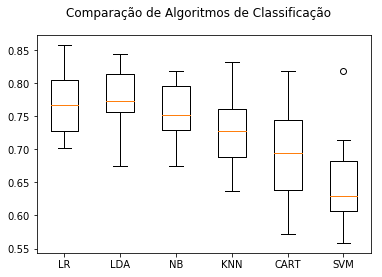

In [50]:
# Import dos módulos
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

## Otimização do Modelo - Ajuste de Hyperparâmetros

Todos os algoritmos de Machine Learning são parametrizados, o que significa que você pode ajustar a performance do seu modelo preditivo, através do tuning (ajuste fino) dos parâmetros. Seu trabalho é encontrar a melhor combinação entre os parâmetros em cada algoritmo de Machine Learning. Esse processo também é chamado de Otimização de Hyperparâmetros. O scikit-learn oferece dois métodos para otimização automática dos parâmetros: Grid Search Parameter Tuning e Random Search Parameter Tuning. 

### Grid Search Parameter Tuning

Este método realiza metodicamente combinações entre todos os parâmetros do algoritmo, criando um grid. Vamos experimentar este método utilizando o algoritmo de Regressão Logística. 

In [51]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)
grid.fit(X, Y)

# Print do resultado
print("Acurácia: %.3f" % (grid.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", grid.best_estimator_)

Acurácia: 77.083
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


### Random Search Parameter Tuning

Este método gera amostras dos parâmetros dos algoritmos a partir de uma distribuição randômica uniforme para um número fixo de iterações. Um modelo é construído e testado para cada combinação de parâmetros.

In [52]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores que serão testados
seed = 7
iterations = 14

# Definindo os valores que serão testados
valores_grid = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Criando o modelo
modelo = LogisticRegression()

# Criando o grid
rsearch = RandomizedSearchCV(estimator = modelo, 
                             param_distributions = valores_grid, 
                             n_iter = iterations, 
                             random_state = seed)
rsearch.fit(X, Y)

# Print dos resultados
print("Acurácia: %.3f" % (rsearch.best_score_ * 100))
print("Melhores Parâmetros do Modelo:\n", rsearch.best_estimator_)

Acurácia: 77.083
Melhores Parâmetros do Modelo:
 LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


# Salvando o resultado do seu trabalho

In [53]:
# Salvando o resultado do seu trabalho
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, 
                                                        random_state = seed)

# Criando o modelo
modelo = LogisticRegression()

# Treinando o modelo
modelo.fit(X_treino, Y_treino)

# Salvando o modelo
arquivo = 'modelos/modelo_classificador_final.sav'
pickle.dump(modelo, open(arquivo, 'wb'))
print("Modelo salvo!")

# Carregando o arquivo
modelo_classificador_final = pickle.load(open(arquivo, 'rb'))
modelo_prod = modelo_classificador_final.score(X_teste, Y_teste)
print("Modelo carregado!")

# Print do resultado
print("Acurácia: %.3f" % (modelo_prod.mean() * 100))

Modelo salvo!
Modelo carregado!
Acurácia: 75.591


# Otimizando Performance com Métodos Ensemble

Métodos Ensemble permitem aumentar consideravelmente o nível de precisão nas suas previsões. Veremos como criar alguns dos Métodos Ensemble mais poderosos em Python. Existem 3 métodos principais para combinar previsões a partir de diferentes modelos:

Bagging - Para construção de múltiplos modelos (normalmente do mesmo tipo) a partir de diferentes subsets no dataset de treino.

Boosting - Para construção de múltiplos modelos (normalmente do mesmo tipo), onde cada modelo aprende a corrigir os erros gerados pelo modelo anterior, dentro da sequência de modelos criados.

Voting - Para construção de múltiplos modelos (normalmente de tipos diferentes) e estatísticas simples (como a média) são usadas para combinar as previsões.

Vejamos como utilizar estes métodos.

### Bagged Decision Trees

Este método funciona bem quando existe alta variância nos dados

In [54]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Cria o modelo unitário (classificador fraco)
cart = DecisionTreeClassifier()

# Definindo o número de trees
num_trees = 100

# Criando o modelo bagging
modelo = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, 
                           random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.913


### Random Forest

Random Forest é uma extensão do Baggig Decision Tree. Amostras do dataset de treino são usadas com reposição, mas as árvores são criadas de uma forma que reduz a correlação entre classificadores individuais (Random Forest é um conjunto de árvores de decisão).

In [55]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100
max_features = 3

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 76.172


### AdaBoost

Algoritmos baseados em Boosting Ensemble criam uma sequência de modelos que tentam corrigir os erros dos modelos anteriores dentro da sequência. Uma vez criados, os modelos fazem previsões que podem receber um peso de acordo com sua acurácia e os resultados são combinados para criar uma previsão única final. 

O AdaBoost atribui pesos às instâncias no dataset, definindo quão fácil ou difícil elas são para o processo de classificação, permitindo que o algoritmo tenha mais ou menos atenção às instâncias durante o processo de construção dos modelos.

In [56]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 30

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.528


### Gradient Boosting

Também chamado Stochastic Gradient Boosting, é um dos métodos Ensemble mais sofisticados.

In [57]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)

# Cross Validation
resultado = cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 75.919


### Voting Ensemble

Este é um dos métodos Ensemble mais simples. Este método cria dois ou mais modelos separados a partir do dataset de treino. O Classificador Voting então utiliza a média das previsões de cada sub-modelo para fazer as previsões em novos conjuntos de dados. As previsões de cada sub-modelo podem receber pesos, através de parâmetros definidos manualmente ou através de heurística. Existem versões mais avançadas do Voting, em que o modelo pode aprender o melhor peso a ser atribuído aos sub-modelos. Isso é chamado Stacked Aggregation, mas ainda não está disponível no Scikit-learn.

In [58]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo os valores para o número de folds
num_folds = 10
seed = 7

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando os modelos
estimators = []

modelo1 = LogisticRegression()
estimators.append(('logistic', modelo1))

modelo2 = DecisionTreeClassifier()
estimators.append(('cart', modelo2))

modelo3 = SVC()
estimators.append(('svm', modelo3))

# Criando o modelo ensemble
ensemble = VotingClassifier(estimators)

# Cross Validation
resultado = cross_val_score(ensemble, X, Y, cv = kfold)

# Resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 74.356


## Algoritmo XGBoost - Extreme Gradient Boosting

O algoritmo XGBoost é uma extensão do GBM (Gradient Boosting Method) que permite trabalhar com multithreading em uma única máquina e processamento paralelo em um cluster de vários servidores. A principal vantagem do XGBoost sobre o GBM é sua capacidade de gerenciar dados esparsos. O XGBoost automaticamente aceita dados esparsos como input sem armazenar zeros na memória.

Principais vantagensdo XGBoost:

1- Aceita dados esparsos (o que permite trabalhar com matrizes esparsas), sem a necessidade de conversão para matrizes densas.

2- Constrói uma árvore de aprendizagem utilizando um moderno método de split (chamado quatile sketch), o que resulta em tempo de processamento muito menor que métodos tradicionais.

3- Permite computação paralela em uma única máquina (através do uso de multithreading) e processamento paralelo em máquinas distribuídas em cluster.

Basicamente o XGBoost utiliza os mesmos parâmetros do GBM e permite tratamento avançado de dados missing.

O XGBoost é muito utilizado por Cientistas de Dados que vencem competições no Kaggle. Repositório no Github: https://github.com/dmlc/XGBoost

### Instalar XGBoost a partir do PyPi
!pip install xgboost

In [59]:
!pip install xgboost==0.80

In [60]:
# Import dos módulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Carregando os dados
arquivo = 'data/pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values

# Separando o array em componentes de input e output
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, 
                                                        random_state = seed)

# Criando o modelo
modelo = XGBClassifier()

# Treinando o modelo
modelo.fit(X_treino, y_treino)

# Pront do modelo
print(modelo)

# Fazendo previsões
y_pred = modelo.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracy = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Acurácia: 77.95%


# Fim